## **Analysis of Temperature and Wind Variability Using ERA5 Data**

### **Overview**
This Jupyter Notebook analyzes temperature and wind data (u-wind and v-wind components) over a 4-day period in the **Fort McMurray** region using ERA5 reanalysis datasets. The notebook processes **12 individual NetCDF files** (4 files each for temperature, u-wind, and v-wind components), combines them into three unified datasets, and identifies grid cells with the **widest** and **narrowest temperature ranges** for comparative analysis.

---

### **Objectives**
1. **Load and Combine ERA5 Datasets**:  
   - Read and merge separate NetCDF files for **temperature** (t2m), **u-wind** (u10), and **v-wind** (v10) over April 30th to May 3rd into three distinct DataFrames.  
2. **Temperature Range Analysis**:  
   - Identify grid cells with the **widest** and **narrowest** temperature variability.  
   - Visualize temperature trends for these grid cells over the 4-day period.  
3. **Wind Component Analysis**:  
   - Extract and plot **u-wind** (East-West) and **v-wind** (North-South) components for the identified grid cells.  
   - Ensure consistent comparison by applying **shared y-axis limits** across wind intensity plots.  

---

### **Data Used**
- **Input**:  
   - `April-30-temp.nc`, `May-01-temp.nc`, `May-02-temp.nc`, `May-03-temp.nc`  
   - `April-30-u-wind.nc`, `May-01-u-wind.nc`, `May-02-u-wind.nc`, `May-03-u-wind.nc`  
   - `April-30-v-wind.nc`, `May-01-v-wind.nc`, `May-02-v-wind.nc`, `May-03-v-wind.nc`  
- **Region of Interest**:  
   - Latitude: **56.0°N to 57.5°N**  
   - Longitude: **-112.5°W to -110.0°W**  
- **Output**:  
   - Combined DataFrames for Temperature, U-Wind, and V-Wind.  

---

### **Key Results**
1. **Temperature Range Comparison**:
   - Identify grid cells with the **widest** and **narrowest** temperature ranges.  
   - Visualize temperature trends and overlay the monthly normal temperature for context.  

2. **Wind Intensity Analysis**:
   - Extract and plot the **u-wind** and **v-wind** components for the grid cells with the widest and narrowest temperature ranges.  
   - Use **shared y-axis limits** for consistent comparison between the two grid cells.  

3. **Data Integrity**:
   - Ensure all grid cells span the full time range (April 30 to May 3) before performing the analysis.  

---

### **Dependencies**
- **Python Libraries**:  
   - `xarray`, `pandas`, `matplotlib`, `numpy`  

---

### **Visualizations**
1. **Temperature Trends**:
   - Line plots of temperature for grid cells with the widest and narrowest temperature ranges over 4 days.  
2. **Wind Intensity**:
   - Plots of U-Wind and V-Wind components for the grid cells with the widest and narrowest temperature ranges.  
   - Shared y-axis limits for consistent wind intensity comparison.  

---


In [1]:
import xarray as xr
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Step 1: Define paths and group files by variable
data_dir = "../data/NetCDF"  # Adjust path as needed
file_groups = {
    "temperature": ["April-30-temp.nc", "May-01-temp.nc", "May-02-temp.nc", "May-03-temp.nc"],
    "u_wind": ["April-30-u-wind.nc", "May-01-u-wind.nc", "May-02-u-wind.nc", "May-03-u-wind.nc"],
    "v_wind": ["April-30-v-wind.nc", "May-01-v-wind.nc", "May-02-v-wind.nc", "May-03-v-wind.nc"]
}

# Step 2: Function to load and combine NetCDF files for each variable
def load_and_combine_netcdf(file_list, variable_name, data_dir):
    """
    Load multiple NetCDF files for a given variable and combine them into a single DataFrame.
    """
    combined_df = []
    for file in file_list:
        file_path = os.path.join(data_dir, file)
        print(f"Loading {variable_name} data from: {file_path}")
        
        # Open NetCDF file and convert to DataFrame
        ds = xr.open_dataset(file_path)
        df = ds.to_dataframe().reset_index()
        
        # Drop missing values and rename the variable column
        df = df.dropna().rename(columns={list(ds.data_vars.keys())[0]: "value"})
        df["variable"] = variable_name  # Add variable name column
        combined_df.append(df)
    
    # Combine all DataFrames
    final_df = pd.concat(combined_df, ignore_index=True)
    return final_df

# Step 3: Load and combine data for each variable
print("Loading and combining Temperature files...")
temperature_df = load_and_combine_netcdf(file_groups["temperature"], "temperature", data_dir)

print("\nLoading and combining U-Wind files...")
u_wind_df = load_and_combine_netcdf(file_groups["u_wind"], "u_wind", data_dir)

print("\nLoading and combining V-Wind files...")
v_wind_df = load_and_combine_netcdf(file_groups["v_wind"], "v_wind", data_dir)

# Step 4: Display the head and tail of each DataFrame
print("\nTemperature DataFrame:")
display(temperature_df.head())
display(temperature_df.tail())

print("\nU-Wind DataFrame:")
display(u_wind_df.head())
display(u_wind_df.tail())

print("\nV-Wind DataFrame:")
display(v_wind_df.head())
display(v_wind_df.tail())


Loading and combining Temperature files...
Loading temperature data from: ../data/NetCDF/April-30-temp.nc
Loading temperature data from: ../data/NetCDF/May-01-temp.nc
Loading temperature data from: ../data/NetCDF/May-02-temp.nc
Loading temperature data from: ../data/NetCDF/May-03-temp.nc

Loading and combining U-Wind files...
Loading u_wind data from: ../data/NetCDF/April-30-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-01-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-02-u-wind.nc
Loading u_wind data from: ../data/NetCDF/May-03-u-wind.nc

Loading and combining V-Wind files...
Loading v_wind data from: ../data/NetCDF/April-30-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-01-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-02-v-wind.nc
Loading v_wind data from: ../data/NetCDF/May-03-v-wind.nc

Temperature DataFrame:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,290.940430,temperature
1,2016-04-30,57.35,-111.95,0,0001,291.649963,temperature
2,2016-04-30,57.35,-111.85,0,0001,291.912292,temperature
3,2016-04-30,57.35,-111.75,0,0001,292.269775,temperature
4,2016-04-30,57.35,-111.65,0,0001,292.318542,temperature


,valid_time,latitude,longitude,number,expver,value,variable
18811,2016-05-03 23:00:00,56.05,-111.15,0,0001,300.141663,temperature
18812,2016-05-03 23:00:00,56.05,-111.05,0,0001,300.470276,temperature
18813,2016-05-03 23:00:00,56.05,-110.95,0,0001,300.920837,temperature
18814,2016-05-03 23:00:00,56.05,-110.85,0,0001,301.303223,temperature
18815,2016-05-03 23:00:00,56.05,-110.75,0,0001,301.491455,temperature



U-Wind DataFrame:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,0.412813,u_wind
1,2016-04-30,57.35,-111.95,0,0001,0.368807,u_wind
2,2016-04-30,57.35,-111.85,0,0001,0.327853,u_wind
3,2016-04-30,57.35,-111.75,0,0001,0.280917,u_wind
4,2016-04-30,57.35,-111.65,0,0001,0.239474,u_wind


,valid_time,latitude,longitude,number,expver,value,variable
18811,2016-05-03 23:00:00,56.05,-111.15,0,0001,1.107517,u_wind
18812,2016-05-03 23:00:00,56.05,-111.05,0,0001,1.031284,u_wind
18813,2016-05-03 23:00:00,56.05,-110.95,0,0001,0.996189,u_wind
18814,2016-05-03 23:00:00,56.05,-110.85,0,0001,0.981510,u_wind
18815,2016-05-03 23:00:00,56.05,-110.75,0,0001,1.005893,u_wind



V-Wind DataFrame:


,valid_time,latitude,longitude,number,expver,value,variable
0,2016-04-30,57.35,-112.05,0,0001,3.472565,v_wind
1,2016-04-30,57.35,-111.95,0,0001,3.432495,v_wind
2,2016-04-30,57.35,-111.85,0,0001,3.403244,v_wind
3,2016-04-30,57.35,-111.75,0,0001,3.353394,v_wind
4,2016-04-30,57.35,-111.65,0,0001,3.323166,v_wind


,valid_time,latitude,longitude,number,expver,value,variable
18811,2016-05-03 23:00:00,56.05,-111.15,0,0001,3.221997,v_wind
18812,2016-05-03 23:00:00,56.05,-111.05,0,0001,3.214612,v_wind
18813,2016-05-03 23:00:00,56.05,-110.95,0,0001,3.184400,v_wind
18814,2016-05-03 23:00:00,56.05,-110.85,0,0001,3.164807,v_wind
18815,2016-05-03 23:00:00,56.05,-110.75,0,0001,3.134107,v_wind


Widest Range Cell: 57.35, -111.35000000000004, Range: 26.23 K
Narrowest Range Cell: 56.05, -111.55000000000003, Range: 22.71 K


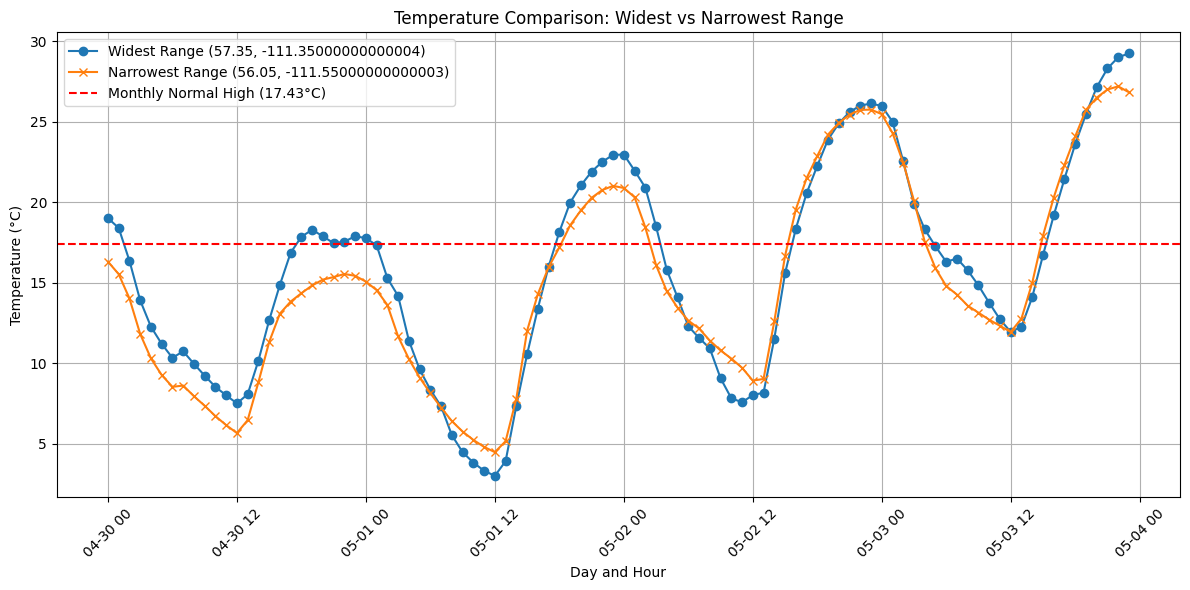

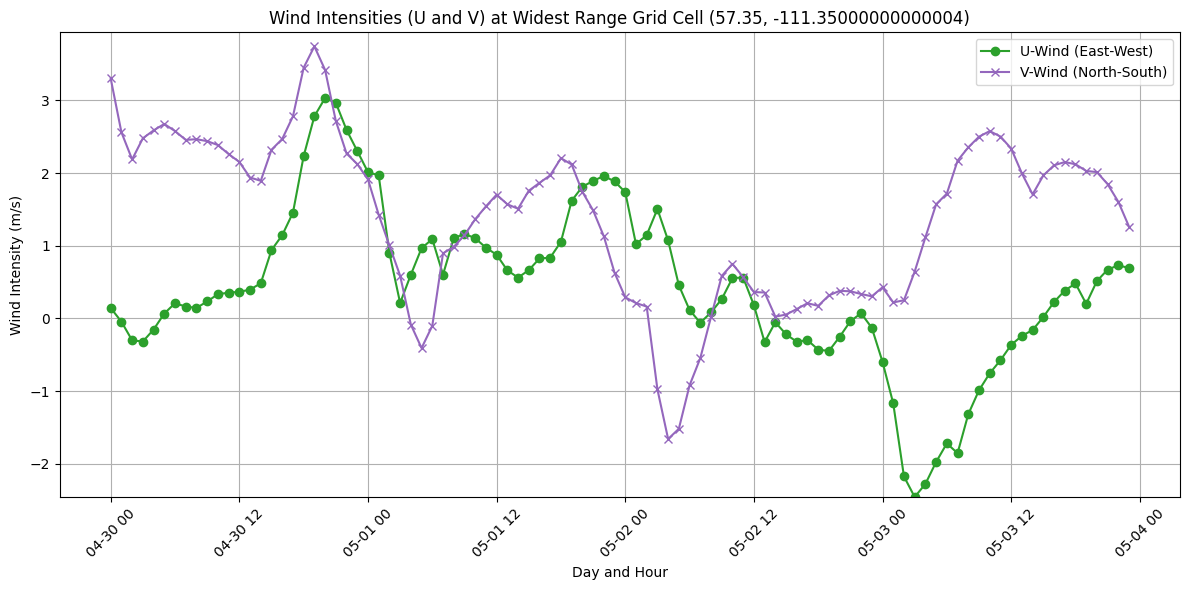

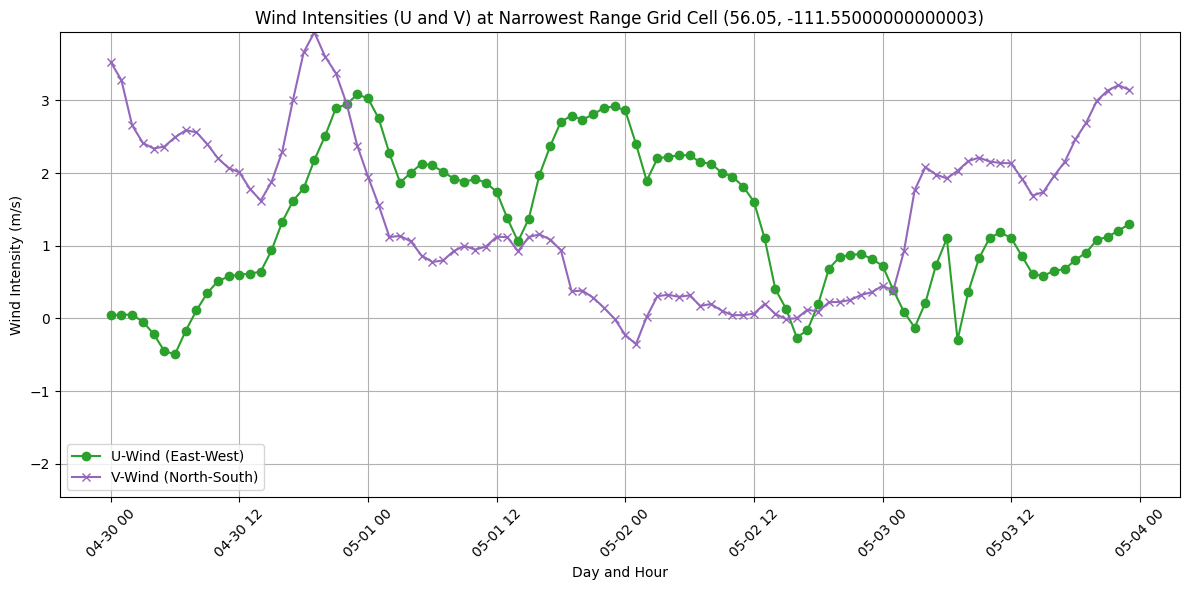

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Step 1: DataFrames already loaded
# Assume temperature_df, u_wind_df, and v_wind_df are already in memory

# Step 2: Find the grid cells with widest and narrowest temperature ranges
temperature_df['valid_time'] = pd.to_datetime(temperature_df['valid_time'])

# Group by grid cell and calculate temperature range
range_summary = (
    temperature_df.groupby(['latitude', 'longitude'])['value']
    .agg(lambda x: x.max() - x.min())
    .reset_index()
    .rename(columns={'value': 'temp_range'})
)

# Find widest and narrowest range cells
widest_cell = range_summary.loc[range_summary['temp_range'].idxmax()]
narrowest_cell = range_summary.loc[range_summary['temp_range'].idxmin()]

widest_lat, widest_lon = widest_cell['latitude'], widest_cell['longitude']
narrowest_lat, narrowest_lon = narrowest_cell['latitude'], narrowest_cell['longitude']

print(f"Widest Range Cell: {widest_lat}, {widest_lon}, Range: {widest_cell['temp_range']:.2f} K")
print(f"Narrowest Range Cell: {narrowest_lat}, {narrowest_lon}, Range: {narrowest_cell['temp_range']:.2f} K")

# Step 3: Extract temperature data for widest and narrowest range cells
def extract_temp_data(df, lat, lon):
    return df[(df['latitude'] == lat) & (df['longitude'] == lon)].copy()

temp_widest = extract_temp_data(temperature_df, widest_lat, widest_lon)
temp_narrowest = extract_temp_data(temperature_df, narrowest_lat, narrowest_lon)

temp_widest['temperature_c'] = temp_widest['value'] - 273.15
temp_narrowest['temperature_c'] = temp_narrowest['value'] - 273.15

# Step 4: Extract wind data for widest and narrowest range cells
def extract_wind_data(df, lat, lon):
    return df[(df['latitude'] == lat) & (df['longitude'] == lon)].copy()

u_wind_widest = extract_wind_data(u_wind_df, widest_lat, widest_lon)
v_wind_widest = extract_wind_data(v_wind_df, widest_lat, widest_lon)

u_wind_narrowest = extract_wind_data(u_wind_df, narrowest_lat, narrowest_lon)
v_wind_narrowest = extract_wind_data(v_wind_df, narrowest_lat, narrowest_lon)

# Determine shared y-axis limits for wind plots
wind_min = min(u_wind_widest['value'].min(), v_wind_widest['value'].min(),
               u_wind_narrowest['value'].min(), v_wind_narrowest['value'].min())
wind_max = max(u_wind_widest['value'].max(), v_wind_widest['value'].max(),
               u_wind_narrowest['value'].max(), v_wind_narrowest['value'].max())

# Step 5: Plot Temperature Comparison
plt.figure(figsize=(12, 6))
plt.plot(temp_widest['valid_time'], temp_widest['temperature_c'], label=f"Widest Range ({widest_lat}, {widest_lon})", linestyle='-', marker='o')
plt.plot(temp_narrowest['valid_time'], temp_narrowest['temperature_c'], label=f"Narrowest Range ({narrowest_lat}, {narrowest_lon})", linestyle='-', marker='x')
plt.axhline(y=17.43, color='r', linestyle='--', label='Monthly Normal High (17.43°C)')
plt.title("Temperature Comparison: Widest vs Narrowest Range")
plt.xlabel("Day and Hour")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Plot U-V Wind Intensities for Widest Range
plt.figure(figsize=(12, 6))
plt.plot(u_wind_widest['valid_time'], u_wind_widest['value'], label="U-Wind (East-West)", color='tab:green', marker='o')
plt.plot(v_wind_widest['valid_time'], v_wind_widest['value'], label="V-Wind (North-South)", color='tab:purple', marker='x')
plt.title(f"Wind Intensities (U and V) at Widest Range Grid Cell ({widest_lat}, {widest_lon})")
plt.xlabel("Day and Hour")
plt.ylabel("Wind Intensity (m/s)")
plt.ylim(wind_min, wind_max)  # Shared y-axis limits
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 7: Plot U-V Wind Intensities for Narrowest Range
plt.figure(figsize=(12, 6))
plt.plot(u_wind_narrowest['valid_time'], u_wind_narrowest['value'], label="U-Wind (East-West)", color='tab:green', marker='o')
plt.plot(v_wind_narrowest['valid_time'], v_wind_narrowest['value'], label="V-Wind (North-South)", color='tab:purple', marker='x')
plt.title(f"Wind Intensities (U and V) at Narrowest Range Grid Cell ({narrowest_lat}, {narrowest_lon})")
plt.xlabel("Day and Hour")
plt.ylabel("Wind Intensity (m/s)")
plt.ylim(wind_min, wind_max)  # Shared y-axis limits
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
